<a href="https://colab.research.google.com/github/munnurumahesh03-coder/Amazon-ML-Hackathon-2025/blob/main/Baseline_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importings**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set some display options for better viewing
pd.set_option('display.max_colwidth', 100)

In [ ]:
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ ERROR: train.csv or test.csv not found. Please make sure they are uploaded to the Colab session.")

✅ Data loaded successfully!


In [ ]:
train_df

,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.890
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Or...",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.120
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet ...",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.970
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings an...,https://m.media-amazon.com/images/I/41mu0HAToDL.jpg,30.340
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nBullet Point: kedem Sherry Cook...",https://m.media-amazon.com/images/I/41sA037+QvL.jpg,66.490
...,...,...,...,...
74995,41424,"Item Name: ICE BREAKERS Spearmint Sugar Free Mints Tins, 1.5 oz (8 Count)\nBullet Point 1: Conta...",https://m.media-amazon.com/images/I/81p9PcPsffL.jpg,10.395
74996,35537,"Item Name: Davidson's Organics, Vanilla Essence, 100-count Individually Wrapped Tea Bags\nBullet...",https://m.media-amazon.com/images/I/51DDKoa+mbL.jpg,35.920
74997,249971,Item Name: Jolly Rancher Hard Candy - Blue Raspberry - 5 Pound Resealable Bag\nProduct Descripti...,https://m.media-amazon.com/images/I/91R2XCcpUfL.jpg,50.330
74998,188322,"Item Name: Nescafe Dolce Gusto Capsules - CARAMEL MACCHIATO, 16 Pods\nBullet Point 1: Nescafe Do...",https://m.media-amazon.com/images/I/51W40YU98+L.jpg,15.275


# **EDA**

---



In [ ]:
print("--- Training Data Info ---")
print(f"Shape of training data: {train_df.shape}")
print("\nFirst 5 rows of training data:")
display(train_df.head())
print("\nMissing values in training data:")
print(train_df.isnull().sum())

print("\n\n--- Test Data Info ---")
print(f"Shape of test data: {test_df.shape}")
print("\nFirst 5 rows of test data:")
display(test_df.head())

--- Training Data Info ---
Shape of training data: (75000, 4)

First 5 rows of training data:


,sample_id,catalog_content,image_link,price
0,33127,"Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)\nValue: 72.0\nUnit: Fl Oz\n",https://m.media-amazon.com/images/I/51mo8htwTHL.jpg,4.89
1,198967,"Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)\nBullet Point 1: Or...",https://m.media-amazon.com/images/I/71YtriIHAAL.jpg,13.12
2,261251,"Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)\nBullet ...",https://m.media-amazon.com/images/I/51+PFEe-w-L.jpg,1.97
3,55858,Item Name: Judee’s Blue Cheese Powder 11.25 oz - Gluten-Free and Nut-Free - Use in Seasonings an...,https://m.media-amazon.com/images/I/41mu0HAToDL.jpg,30.34
4,292686,"Item Name: kedem Sherry Cooking Wine, 12.7 Ounce - 12 per case.\nBullet Point: kedem Sherry Cook...",https://m.media-amazon.com/images/I/41sA037+QvL.jpg,66.49



Missing values in training data:
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64


--- Test Data Info ---
Shape of test data: (75000, 3)

First 5 rows of test data:


,sample_id,catalog_content,image_link
0,100179,"Item Name: Rani 14-Spice Eshamaya's Mango Chutney (Indian Preserve) 10.5oz (300g) Glass Jar, Rea...",https://m.media-amazon.com/images/I/71hoAn78AWL.jpg
1,245611,Item Name: Natural MILK TEA Flavoring extract by HALO PANTRY (2oz bottle) | Perfect for customiz...,https://m.media-amazon.com/images/I/61ex8NHCIjL.jpg
2,146263,Item Name: Honey Filled Hard Candy - Bulk Pack 2 Pounds - Individually Wrapped\nBullet Point 1: ...,https://m.media-amazon.com/images/I/61KCM61J8eL.jpg
3,95658,Item Name: Vlasic Snack'mm's Kosher Dill 16 Oz (Pack of 2)\nValue: 2.0\nUnit: Count\n,https://m.media-amazon.com/images/I/51Ex6uOH7yL.jpg
4,36806,"Item Name: McCormick Culinary Vanilla Extract, 32 fl oz - One 32 Fluid Ounce Container of Gluten...",https://m.media-amazon.com/images/I/71QYlrOMoSL.jpg


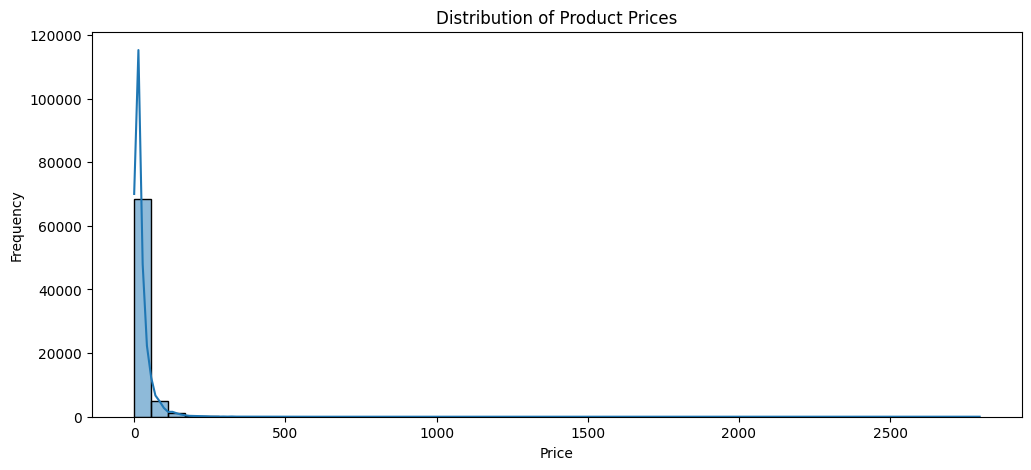


Descriptive Statistics for Price:
count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64


In [ ]:
plt.figure(figsize=(12, 5))

# Plotting the distribution of the price
sns.histplot(train_df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Display descriptive statistics for the price
print("\nDescriptive Statistics for Price:")
print(train_df['price'].describe())

In [ ]:
train_df.describe()

,sample_id,price
count,75000.000000,75000.000000
mean,149841.917707,23.647654
std,86585.346513,33.376932
min,0.000000,0.130000
25%,73845.750000,6.795000
50%,150129.000000,14.000000
75%,225040.250000,28.625000
max,299438.000000,2796.000000


# **Feature Engineering from catalog_content**

---



In [ ]:
# Step: 2.1. Extracting Item Pack Quantity (IPQ)
import re

def extract_ipq(text):
    text = str(text).lower()
    patterns = [
        r'value:\s*(\d+\.?\d*)\s*unit:\s*count', # Explicit count
        r'\(pack of (\d+)\)',                    # (pack of N)
        r'(\d+)\s*per case',                     # N per case
        r'pack of (\d+)',                       # pack of N
        r'count of (\d+)'                       # count of N
    ]
    for pattern in patterns:
        match = re.search(pattern, text)
        if match:
            return float(match.group(1))
    return 1.0

train_df['ipq'] = train_df['catalog_content'].apply(extract_ipq)
test_df['ipq'] = test_df['catalog_content'].apply(extract_ipq)

print("--- IPQ Feature Engineering Results ---")
print(train_df['ipq'].value_counts().head(10))
print("\n✅ IPQ feature created successfully.")

--- IPQ Feature Engineering Results ---
ipq
1.0      47631
6.0       4615
12.0      4524
2.0       2436
3.0       2117
4.0       1823
24.0      1397
8.0        964
100.0      793
10.0       672
Name: count, dtype: int64

✅ IPQ feature created successfully.


In [ ]:
# Step: 2.2. Creating Text Features with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2)
)

X_train_text = tfidf_vectorizer.fit_transform(train_df['catalog_content'])
X_test_text = tfidf_vectorizer.transform(test_df['catalog_content'])

print("--- TF-IDF Feature Engineering Results ---")
print(f"Shape of training text features: {X_train_text.shape}")
print(f"Shape of test text features: {X_test_text.shape}")
print("\n✅ TF-IDF features created successfully.")

--- TF-IDF Feature Engineering Results ---
Shape of training text features: (75000, 5000)
Shape of test text features: (75000, 5000)

✅ TF-IDF features created successfully.


# **Data Preparation for Modeling**

---



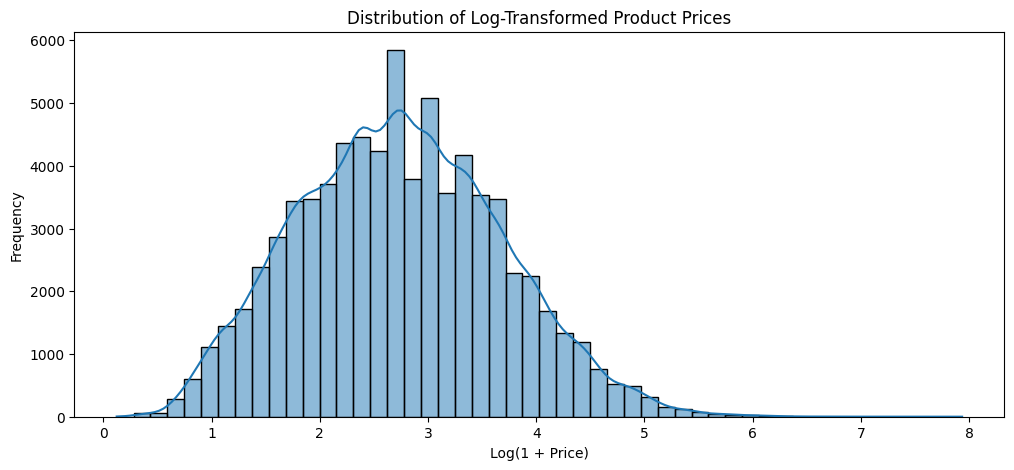

✅ 'price_log' column created and distribution plotted.
The distribution should now look much more like a bell curve, which is ideal for our model.


In [ ]:
# Step: 3.1. Log-Transforming the Target Variable

# Apply the log-transform to the 'price' column.
# np.log1p(x) is equivalent to np.log(1 + x), which is a standard and safe way to perform a log transform.
train_df['price_log'] = np.log1p(train_df['price'])

# Plot the new distribution to confirm it's more normal (bell-shaped)
plt.figure(figsize=(12, 5))
sns.histplot(train_df['price_log'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Product Prices')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Frequency')
plt.show()

print("✅ 'price_log' column created and distribution plotted.")
print("The distribution should now look much more like a bell curve, which is ideal for our model.")

In [ ]:
# Step: 3.2. Combining Features for Modeling

from scipy.sparse import hstack, csr_matrix

# Reshape the 'ipq' column to be a 2D sparse matrix for stacking
ipq_train_sparse = csr_matrix(train_df['ipq'].values.reshape(-1, 1))
ipq_test_sparse = csr_matrix(test_df['ipq'].values.reshape(-1, 1))

# Horizontally stack the TF-IDF features (sparse) and the IPQ feature (now also sparse)
# This creates our final feature matrix, X
X = hstack([X_train_text, ipq_train_sparse])
X_test = hstack([X_test_text, ipq_test_sparse])

# Define our final target variable, y
y = train_df['price_log']

# Print the final shapes to confirm everything is correct
print("--- Combined Feature Matrices ---")
print(f"Shape of final training feature matrix (X): {X.shape}")
print(f"Shape of final test feature matrix (X_test): {X_test.shape}")
print(f"Shape of target variable (y): {y.shape}")
print("\n✅ All features have been combined into the final matrices X and X_test.")

--- Combined Feature Matrices ---
Shape of final training feature matrix (X): (75000, 5001)
Shape of final test feature matrix (X_test): (75000, 5001)
Shape of target variable (y): (75000,)

✅ All features have been combined into the final matrices X and X_test.


# **Model Training: LightGBM Baseline.**

---



In [ ]:
# Step 4.1: Split X and y into training and validation sets

from sklearn.model_selection import train_test_split

# We split our full training feature matrix 'X' and target vector 'y'
# into a training set (for the model to learn from)
# and a validation set (to see how well it learned).
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,    # We'll hold out 20% of the data for validation
    random_state=42   # This ensures the split is the same every time
)

print("--- Data Splitting Results ---")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val:   {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val:   {y_val.shape}")
print("\n✅ Data successfully split into training and validation sets.")


--- Data Splitting Results ---
Shape of X_train: (60000, 5001)
Shape of X_val:   (15000, 5001)
Shape of y_train: (60000,)
Shape of y_val:   (15000,)

✅ Data successfully split into training and validation sets.


In [ ]:
# Step 4.2: Initialize the LGBMRegressor model

import lightgbm as lgb

# Initialize the LightGBM Regressor model with standard, robust starting parameters.
# 'random_state' ensures our results are reproducible.
lgbm = lgb.LGBMRegressor(random_state=42)

print("✅ LightGBM model initialized successfully.")
print("Model parameters:")
print(lgbm)


✅ LightGBM model initialized successfully.
Model parameters:
LGBMRegressor(random_state=42)


In [ ]:
# Step 4.3: Train the model

print("--- Training the LightGBM model on the training set... ---")

# We fit the model on the X_train and y_train variables we created in the split.
lgbm.fit(X_train, y_train)

print("\n✅ Model training complete.")


--- Training the LightGBM model on the training set... ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.407066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 720904
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 5001
[LightGBM] [Info] Start training from score 2.740904

✅ Model training complete.


In [ ]:
# Step 4.4: Make predictions on the validation set

print("--- Making predictions on the validation set... ---")

# Use the trained model 'lgbm' to predict on the validation features 'X_val'.
y_pred_val = lgbm.predict(X_val)

print("\n✅ Predictions made successfully.")
print(f"Shape of the predictions array: {y_pred_val.shape}")
print("\nFirst 5 predictions (these are in log scale):")
print(y_pred_val[:5])

--- Making predictions on the validation set... ---

✅ Predictions made successfully.
Shape of the predictions array: (15000,)

First 5 predictions (these are in log scale):
[2.68843133 3.96956465 2.41774957 1.85575647 3.20108697]


In [ ]:
# Step 4.5: Define the SMAPE scoring function

import numpy as np

def calculate_smape(y_true, y_pred):
    """
    Calculates the Symmetric Mean Absolute Percentage Error (SMAPE).
    This function assumes y_true and y_pred are log-transformed values.
    """
    # We must convert the log-transformed values back to their original price scale
    # before calculating the error. np.expm1 is the inverse of np.log1p.
    y_true_orig = np.expm1(y_true)
    y_pred_orig = np.expm1(y_pred)

    # Calculate the SMAPE formula
    numerator = np.abs(y_pred_orig - y_true_orig)
    denominator = (np.abs(y_true_orig) + np.abs(y_pred_orig)) / 2

    # A safe way to handle cases where both true and predicted are 0
    ratio = np.where(denominator == 0, 0, numerator / denominator)

    # The final score is the mean of the ratios, multiplied by 100 to get a percentage
    score = np.mean(ratio) * 100

    return score

print("✅ SMAPE scoring function defined successfully.")

✅ SMAPE scoring function defined successfully.


In [ ]:
# Step 4.6: Calculate the SMAPE score on the validation set

# Use the function we just defined with our true validation values (y_val)
# and our predicted validation values (y_pred_val).
validation_smape = calculate_smape(y_val, y_pred_val)

print("--- Baseline Model Performance ---")
print(f"SMAPE Score on the Validation Set: {validation_smape:.4f}%")

--- Baseline Model Performance ---
SMAPE Score on the Validation Set: 56.8798%


# **Final Submission.**

---



In [ ]:
# Step 5.1: Re-train the model on the entire dataset

print("--- Training the final model on 100% of the training data... ---")

# We use the same model initialization as before
final_model = lgb.LGBMRegressor(random_state=42)

# This time, we fit on the full training dataset 'X' and 'y'
final_model.fit(X, y)

print("\n✅ Final model training complete.")

--- Training the final model on 100% of the training data... ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.476141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 810691
[LightGBM] [Info] Number of data points in the train set: 75000, number of used features: 5001
[LightGBM] [Info] Start training from score 2.739217

✅ Final model training complete.


In [ ]:
# Step 5.2: Generate final predictions on the test set

print("--- Generating predictions on the official test data... ---")

# Use the 'final_model' to predict on the test feature matrix 'X_test'.
final_predictions_log = final_model.predict(X_test)

print("\n✅ Final predictions generated successfully.")
print(f"Shape of the final predictions array: {final_predictions_log.shape}")
print("\nFirst 5 predictions (in log scale):")
print(final_predictions_log[:5])

--- Generating predictions on the official test data... ---

✅ Final predictions generated successfully.
Shape of the final predictions array: (75000,)

First 5 predictions (in log scale):
[2.896681   2.70564648 3.16889649 2.55587614 3.06967994]


In [ ]:
# Step 5.3: Inverse-transform the predictions

print("--- Converting predictions from log scale back to original price scale... ---")

# Use np.expm1() which is the exact inverse of np.log1p()
final_predictions = np.expm1(final_predictions_log)

# An important constraint is that prices must be positive.
# Let's ensure any small negative predictions (due to numerical instability) are set to 0.
final_predictions[final_predictions < 0] = 0

print("\n✅ Predictions converted back to price scale.")
print("\nFirst 5 predictions (as actual prices):")
print(final_predictions[:5])

--- Converting predictions from log scale back to original price scale... ---

✅ Predictions converted back to price scale.

First 5 predictions (as actual prices):
[17.11392544 13.96398756 22.78122706 11.88258162 20.5350091 ]


In [ ]:
# Step 5.4: Create the final submission.csv file

print("--- Creating the submission file... ---")

# Create a new DataFrame for the submission.
# The 'sample_id' comes from the original test_df.
# The 'price' is our final, converted predictions.
submission_df = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': final_predictions
})

# Save the DataFrame to a CSV file.
# 'index=False' is crucial to prevent pandas from writing an extra index column.
submission_df.to_csv('submission_phase1.csv', index=False)

print("\n✅ Submission file 'submission_phase1.csv' created successfully!")
print("You can now download this file from the Colab file browser on the left and submit it.")
print("\nFirst 5 rows of the submission file:")
display(submission_df.head())

--- Creating the submission file... ---

✅ Submission file 'submission_phase1.csv' created successfully!
You can now download this file from the Colab file browser on the left and submit it.

First 5 rows of the submission file:


,sample_id,price
0,100179,17.113925
1,245611,13.963988
2,146263,22.781227
3,95658,11.882582
4,36806,20.535009


In [ ]:
### **Official Leaderboard Score**

# After submitting the predictions from this baseline model (`submission_phase1.csv`) to the competition platform, we received the following score:

# **Public Leaderboard SMAPE:** **55.640%**

# This is our official benchmark. Our goal is now to create a new model that achieves a score lower than this.
# The close agreement between our validation score (56.88%) and the public leaderboard score (55.64%) gives us confidence
# that our validation strategy is reliable.
